<h1>Short Time Fourier Transform (STFT)</h1>
Short Time Fourier Transform (STFTs) are useful to turn a time series into a spectrogram, manipulate the amplitude and/or phase of the frequencies, and then transform it back into a time series using the inverse Short Time Fourier Transform (iSTFT). The STFT includes a Discrete Fourier Transform (DFT) of a time series after applying a desired windowing function (like Blackman-Harris, Kaiser, Bartlet, ...) to it. Those filters and audio effects that are not implemented in the time domain use the STFT to manipulate the signal in the frequency domain.

<h2>Code to copy</h2>

In [75]:
import numpy as np
import librosa
import math

# example audio:
y, sr = librosa.load(librosa.ex('trumpet'))

#make parameter decisions for STFT:
fs = 512# desired frame size, ideally 2^i
hop = fs/2# hop length, i.e., after how many samples will we carry out the next STFT? fs/2 or fs/4 is common

dirichlet=np.ones(int(fs))# produces the Dirichlet window, which is not included in librosa

winds={0:dirichlet, 1:'blackmanharris', 2:('kaiser',4), 3:'bartlett'} # dictionary of available windows in lobrosa + our own Dirichlet window

x = 0# which window to use (integer between 0 and 3)

# STFT:
spectrogram = librosa.stft(y,window=winds[x],n_fft=fs)
# iSTFT:
timesignal = librosa.istft(spectrogram,window=winds[x],n_fft=fs)

<h2>Example</h2>

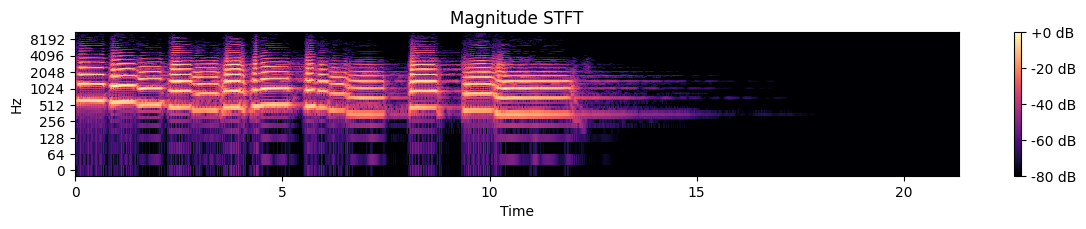

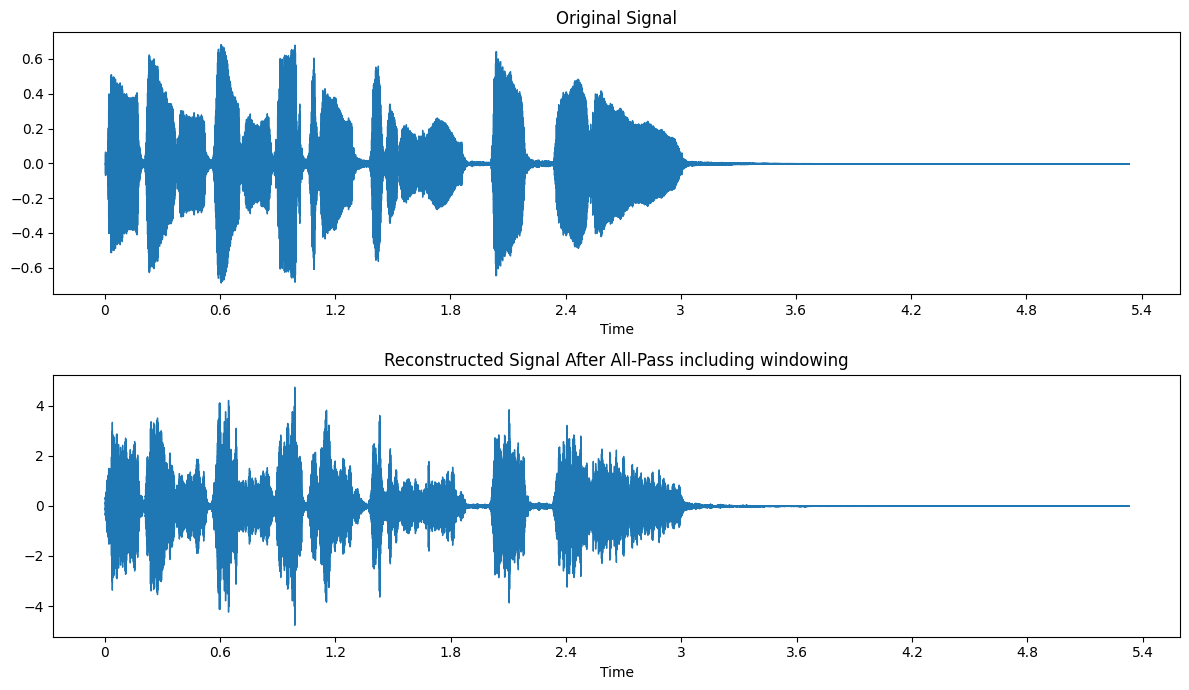

In [82]:
import matplotlib.pyplot as plt
import librosa.display# to produce plot
#import math

# import example sound from librosa:
y, sr = librosa.load(librosa.ex('trumpet'))

#make parameter decisions for STFT:
fs = 512#16384#512#16384#2048#512#16384# desired frame size, ideally 2^i
hop = fs/2# hop length, i.e., after how many samples will we carry out the next STFT? fs/2 or fs/4 is common

dirichlet=np.ones(int(fs))
winds={0:dirichlet, 1:'blackmanharris', 2:('kaiser',4), 3:'bartlett'} # dictionary of available windows

x = 3# which window to use (between 0 and 3)

# STFT
D = librosa.stft(y,window=winds[x],n_fft=fs)
magnitude = np.abs(D)
phase = np.angle(D)

# Apply All-Pass-Filter by manipulating each frequencies' phase:
all_pass_phase = phase**5/7

# iSTFT
synth_D = magnitude * all_pass_phase
y_hat = librosa.istft(synth_D,window=winds[x],n_fft=fs)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude STFT')

plt.tight_layout()

plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_hat, sr=sr)
plt.title('Reconstructed Signal After All-Pass including windowing')


plt.tight_layout()
plt.show()

In [78]:
import IPython.display as ipd#can play audio files with a simple GUI
ipd.Audio(y,rate=sr)#original

In [84]:
ipd.Audio(y_hat,rate=sr)#all-pass-filtered